In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from matplotlib import rcParams

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best


In [4]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask is not None:
        print("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split is not None:
        print("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [5]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask is not None:
        print("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split is not None:
        print("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [6]:
from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [7]:
def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    # Create a meshgrid as our test data
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    Z = clfTree1.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    # Overlay training samples
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    # and testing points
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)

In [8]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

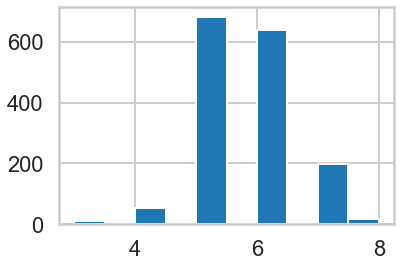

In [9]:
print(df.shape)

plt.hist(df.quality)

In [10]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1

c:\users\abhil\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [11]:
Xnames = list(df.columns.values[1:11])

In [12]:
np.mean(df['target'])

0.1357098186366479

In [13]:
# Create test/train mask
itrain, itest = train_test_split(range(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [14]:
# make sure we didn't get unlucky in our mask selection
print("% Good wines in Training:", np.mean(df.target[mask]))
print("% Good wines in Testing:", np.mean(df.target[~mask]))

% Good wines in Training: 0.13660062565172054
% Good wines in Testing: 0.134375


In [15]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 4, 'min_samples_leaf': 3} 0.31284289830316 {'mean_fit_time': array([0.00059938, 0.00079727, 0.00059986, 0.00079961, 0.00039968,
       0.00099788, 0.000594  , 0.00099864, 0.00059757, 0.00080109,
       0.00079379, 0.00099788, 0.00059943, 0.00079823, 0.00079775,
       0.00059376, 0.00099902, 0.00099807, 0.00099645, 0.00099435,
       0.00119863, 0.00099802, 0.00059757, 0.00039883, 0.0007946 ,
       0.00099769, 0.0009953 , 0.00099378, 0.00079794, 0.00079484,
       0.00099754, 0.00060186, 0.00139937, 0.00119934, 0.00119681,
       0.00099502, 0.00119987, 0.00119929, 0.00119681, 0.00059595,
       0.00079794, 0.00059814]), 'std_fit_time': array([4.89397189e-04, 7.44381811e-04, 4.89788156e-04, 7.48890790e-04,
       4.89513525e-04, 1.65593675e-06, 4.85010189e-04, 1.02934995e-06,
       4.87916468e-04, 4.00568445e-04, 3.96991451e-04, 1.71661377e-06,
       4.89434574e-04, 7.47181826e-04, 3.98876748e-04, 4.84863831e-04,
       2.47955322e-06, 1.14242063e-06, 2

c:\users\abhil\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


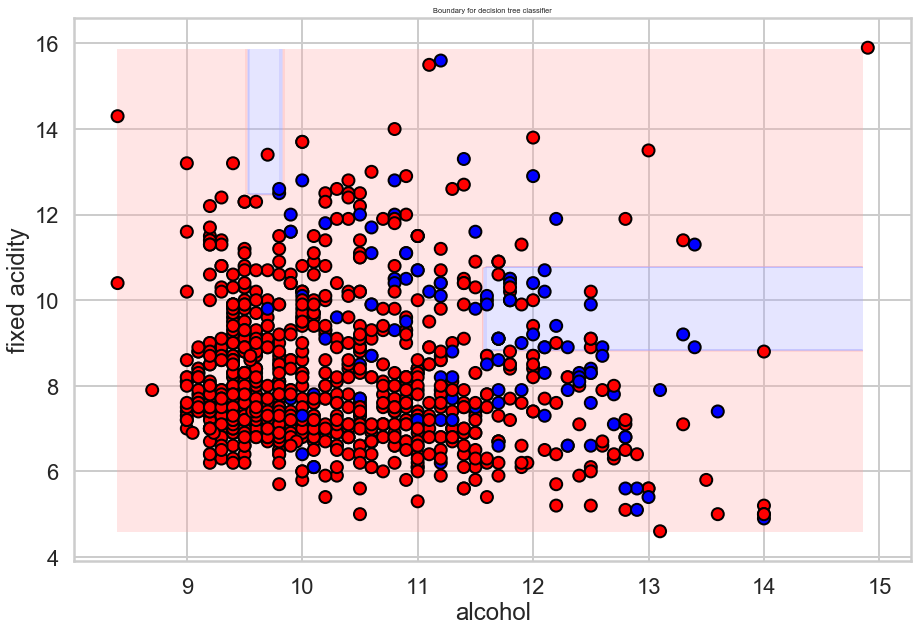

In [16]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_test = False)

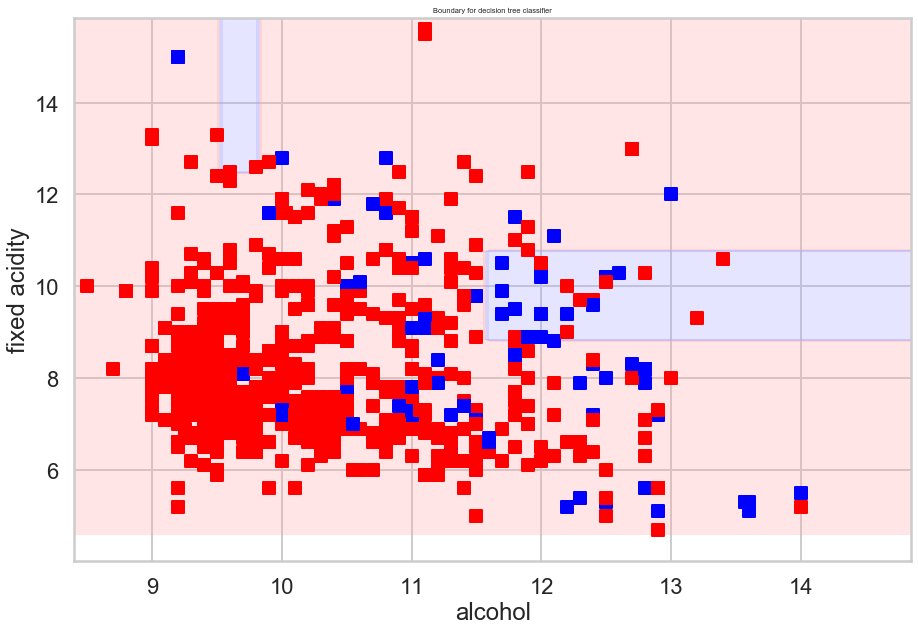

In [17]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = False)

using mask
BEST {'max_depth': None, 'min_samples_leaf': 5} 0.24920650839070763 {'mean_fit_time': array([0.00161233, 0.00120211, 0.00100417]), 'std_fit_time': array([8.29036324e-04, 3.96718973e-04, 1.29726001e-05]), 'mean_score_time': array([0.00117788, 0.00099626, 0.00119095]), 'std_score_time': array([0.00041003, 0.00063068, 0.00040242]), 'param_max_depth': masked_array(data=[None, None, None],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[4, 5, 6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': None, 'min_samples_leaf': 4}, {'max_depth': None, 'min_samples_leaf': 5}, {'max_depth': None, 'min_samples_leaf': 6}], 'split0_test_score': array([0.34285714, 0.29411765, 0.24242424]), 'split1_test_score': array([0.11764706, 0.22222222, 0.17241379]), 'split2_test_score': array([0.3255814 , 0.36363636, 0.23809524]), 'split3_test_score': a

c:\users\abhil\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


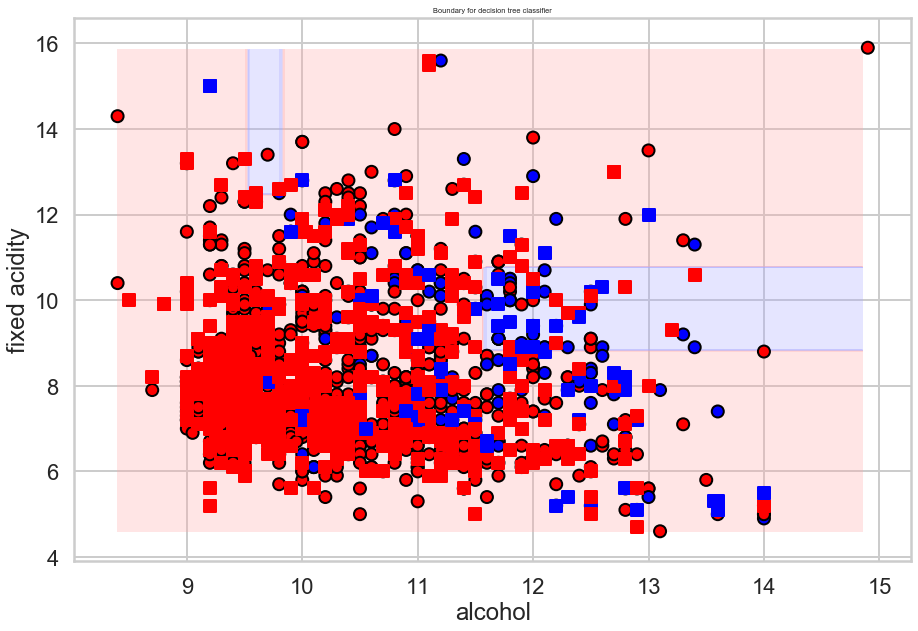

In [18]:
from sklearn import tree
clfTree_temp = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [4, 5, 6]}
clfTree_temp, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree_temp, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree_temp, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = True)

In [19]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, df, 
                                                     Xnames,'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 4, 'min_samples_leaf': 7} 0.38757230055087366 {'mean_fit_time': array([0.00219584, 0.00079732, 0.00120521, 0.00139804, 0.00139561,
       0.00179405, 0.00159092, 0.00140729, 0.00139823, 0.00139966,
       0.00158963, 0.00178843, 0.00159588, 0.00179453, 0.00139656,
       0.00219412, 0.00179524, 0.00179563, 0.00219617, 0.00179296,
       0.0023932 , 0.0031908 , 0.00259705, 0.00299158, 0.0027905 ,
       0.00298939, 0.00299387, 0.00279202, 0.00239191, 0.0021976 ,
       0.00299029, 0.00278859, 0.00298858, 0.00319138, 0.00299549,
       0.00299163, 0.0029923 , 0.00299239, 0.00259361, 0.00279241,
       0.00339055, 0.00379248, 0.00319171, 0.00338845, 0.00319209,
       0.00398879, 0.00319138, 0.00319166, 0.00259137, 0.00239334,
       0.00319171, 0.00299878, 0.00299311, 0.00358939, 0.0035892 ,
       0.00358963, 0.00339198, 0.00319066, 0.00418801, 0.00378971,
       0.00438828, 0.0029922 , 0.00279388, 0.00299177, 0.00299754,
       0.00279279, 0.00299172, 0.00

c:\users\abhil\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 5} 0.390129847404151 {'mean_fit_time': array([0.00279298, 0.00439377, 0.00478783, 0.00777645, 0.01136894,
       0.01416235, 0.01336408, 0.01376309, 0.01535859, 0.02074757,
       0.02433472, 0.01894898, 0.02433887, 0.02234025, 0.02214041,
       0.02313771, 0.03331685, 0.02712712, 0.02992616]), 'std_fit_time': array([0.0003993 , 0.00048572, 0.00039692, 0.00159842, 0.00118035,
       0.00132338, 0.00223982, 0.00222164, 0.00232604, 0.00238766,
       0.00048829, 0.0025234 , 0.00495644, 0.00249229, 0.00039868,
       0.0003988 , 0.00507552, 0.00039907, 0.0041422 ]), 'mean_score_time': array([0.00199447, 0.00139384, 0.00139732, 0.00119677, 0.00199533,
       0.00219412, 0.00199475, 0.00179543, 0.00220075, 0.00278978,
       0.00299206, 0.00219488, 0.00238967, 0.00199485, 0.00199494,
       0.00239387, 0.00338502, 0.00219421, 0.00339603]), 'std_score_time': array([8.06404806e-07, 4.96855267e-04, 4.85848241e-04, 3.99041357e-04,
       1.39020727e-06, 3.98779

c:\users\abhil\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


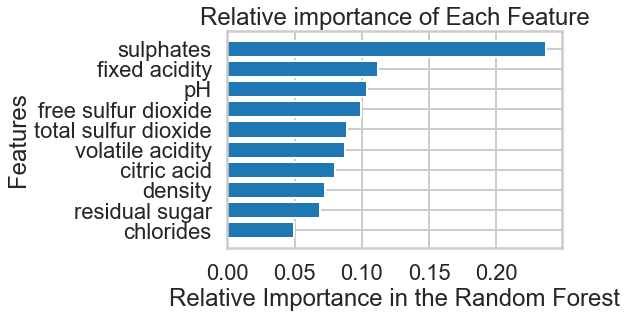

In [21]:
importance_list = clfForest.feature_importances_
name_list = df.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [22]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 12} 0.4288495369711339 {'mean_fit_time': array([0.0259232 , 0.02393031, 0.02373953, 0.0215425 , 0.02732472,
       0.03271265, 0.02752442, 0.02692604, 0.03011904, 0.03111787,
       0.03151603, 0.04408226, 0.04388237, 0.04527507, 0.04308515,
       0.04966755, 0.04408259, 0.04388285, 0.04527841, 0.04767232,
       0.05844302, 0.06084027, 0.06781797, 0.07460036, 0.06003938,
       0.06083794, 0.07221007, 0.09414883, 0.08816667, 0.07380266,
       0.07599516, 0.09135904, 0.07479959, 0.07739339, 0.07380242,
       0.08217854, 0.07998877, 0.08278236, 0.09693575, 0.10152631,
       0.08796101, 0.09355273, 0.10332327, 0.09334946, 0.09015813,
       0.09973316, 0.09215069, 0.09733977, 0.10013237, 0.10232611]), 'std_fit_time': array([2.61308859e-03, 2.51806449e-03, 3.91133276e-03, 2.23592943e-03,
       4.52977205e-03, 1.16351381e-03, 4.78747256e-03, 1.09023019e-03,
       3.41904509e-03, 1.71610114e-03, 1.19688511e-03, 3.17833450e-03,
       7.27445664e-03, 8.

c:\users\abhil\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask


c:\users\abhil\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'max_depth': 5, 'n_estimators': 37} 0.41437839248666863 {'mean_fit_time': array([0.02353806, 0.02233901, 0.01854835, 0.02273927, 0.02014365,
       0.02334166, 0.02533145, 0.0241405 , 0.02433367, 0.02074208,
       0.02593131, 0.02214046, 0.02194996, 0.0213387 , 0.02573071,
       0.0273262 , 0.02612929, 0.0263289 , 0.03251324, 0.03111539,
       0.02632704, 0.02632689, 0.02772646, 0.03151622, 0.02932148,
       0.03410931, 0.026723  , 0.02752857, 0.03390903, 0.03570437,
       0.02692828, 0.0215416 , 0.02453613, 0.02952075, 0.02931972,
       0.02872038, 0.02971864, 0.03011642, 0.03530369, 0.03011942,
       0.03251286, 0.03510175, 0.03231487, 0.03789892, 0.03849597,
       0.0301188 , 0.03889499, 0.03610387, 0.04148908, 0.04427986,
       0.03989863, 0.04328413, 0.05006194, 0.05066442, 0.04347205,
       0.04567771, 0.05545106, 0.04587731, 0.05245976, 0.0566432 ,
       0.04129033, 0.04428067, 0.03849692, 0.03730006, 0.04687209,
       0.04687467, 0.03829546, 0.04148602, 0.0530

In [24]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
# your code here
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]


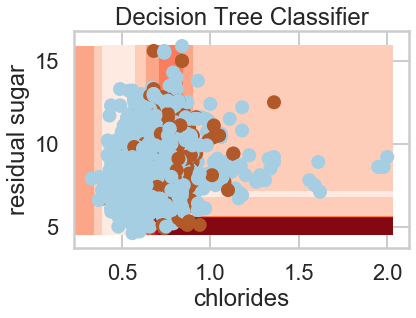

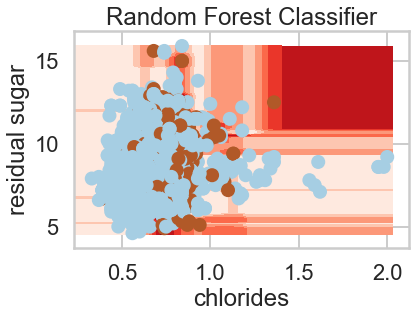

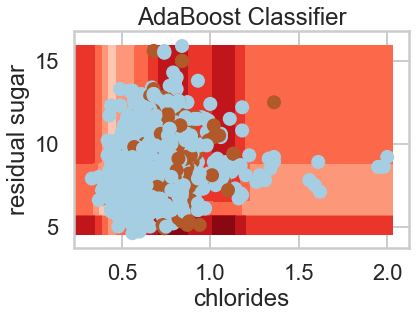

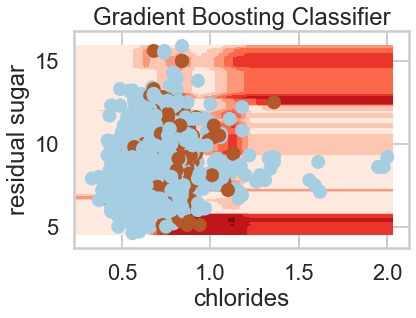

In [25]:
X_imp = df[df.columns[imp_cols]].values
Y = df.target.values

classifiers = [clfTree2,
               clfForest,
               clfAda,
               clfGB,
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in range(4):
    plt.title(titleClassifer[c])
    plt.xlabel(name_list[0])
    plt.ylabel(name_list[1])
    plot_decision_surface(classifiers[c], X_imp, df.target.values)